In [3]:
import os
os.chdir('C:\\Users\\telug\\OneDrive\\Desktop\\WD_python')
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

In [4]:
df=pd.read_csv('HousingData.csv')

In [7]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [8]:
# replacing the missing values of 'CRIM' with median
df['CRIM'] = df['CRIM'].fillna(df['CRIM'].median())

In [12]:
# replacing the missing values of 'ZN' with median
df['ZN'] = df['ZN'].fillna(df['ZN'].median())

In [13]:
# replacing the missing values of 'INDUS' with median
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].median())

In [14]:
df.CHAS.value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

In [17]:
df=df.dropna(axis=0, how='any', thresh=None, subset=['CHAS'])  

In [15]:
# replacing the missing values of 'INDUS' with median
df['AGE'] = df['AGE'].fillna(df['AGE'].median())

In [16]:
# replacing the missing values of 'INDUS' with median
df['LSTAT'] = df['LSTAT'].fillna(df['LSTAT'].median())

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      486 non-null    float64
 5   RM       486 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      486 non-null    float64
 8   RAD      486 non-null    int64  
 9   TAX      486 non-null    int64  
 10  PTRATIO  486 non-null    float64
 11  B        486 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     486 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 57.0 KB


In [19]:
#MEDV - Median value of owner-occupied homes in $1000's(Target Variable)(conti)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of MEDV')

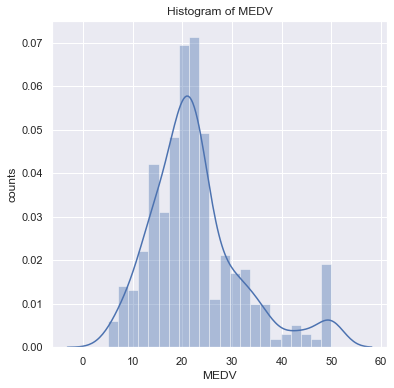

In [22]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['MEDV'])
plt.show
plt.xlabel('MEDV')
plt.ylabel('counts')
plt.title('Histogram of MEDV') 

<AxesSubplot:>

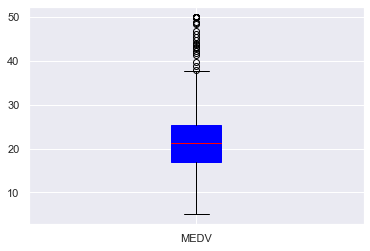

In [23]:
MEDV=df['MEDV']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
MEDV.plot.box(color=props2,patch_artist=True,vert=True)

In [24]:
#CRIM - per capita crime rate by town(conti.)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of CRIM')

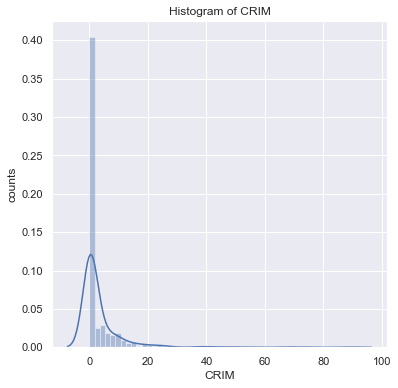

In [25]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['CRIM'])
plt.show
plt.xlabel('CRIM')
plt.ylabel('counts')
plt.title('Histogram of CRIM') 

<AxesSubplot:>

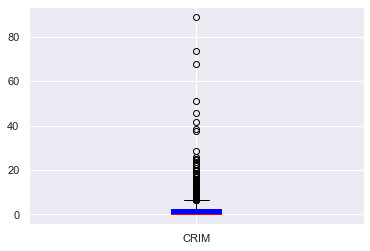

In [26]:
CRIM=df['CRIM']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
CRIM.plot.box(color=props2,patch_artist=True,vert=True)

In [27]:
#ZN - proportion of residential land zoned for lots over 25,000 sq.ft.(cont)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of ZN')

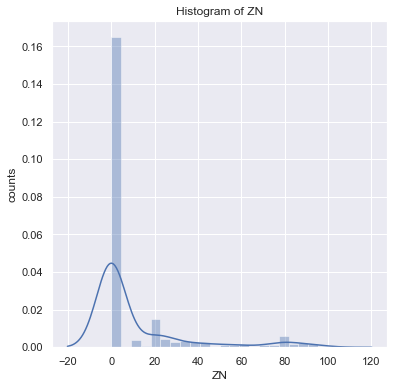

In [28]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['ZN'])
plt.show
plt.xlabel('ZN')
plt.ylabel('counts')
plt.title('Histogram of ZN') 

<AxesSubplot:>

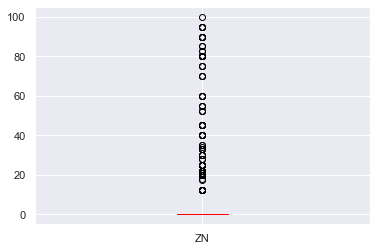

In [29]:
ZN=df['ZN']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
ZN.plot.box(color=props2,patch_artist=True,vert=True)

In [30]:
#INDUS - proportion of non-retail business acres per town.(cont.)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of INDUS')

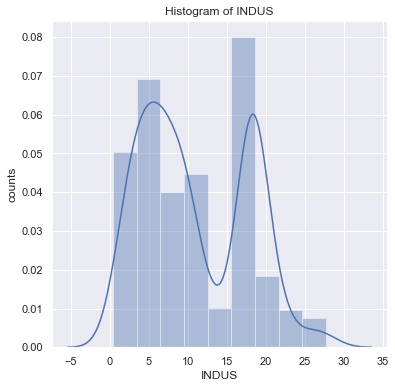

In [31]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['INDUS'])
plt.show
plt.xlabel('INDUS')
plt.ylabel('counts')
plt.title('Histogram of INDUS') 

<AxesSubplot:>

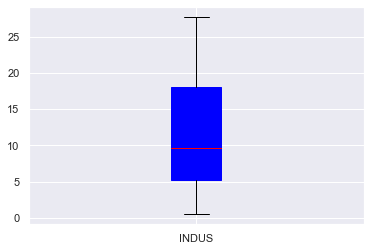

In [32]:
INDUS=df['INDUS']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
INDUS.plot.box(color=props2,patch_artist=True,vert=True)

In [33]:
#CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)(cat.)

In [35]:
df.CHAS.value_counts()

0.0    452
1.0     34
Name: CHAS, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of CHAS')

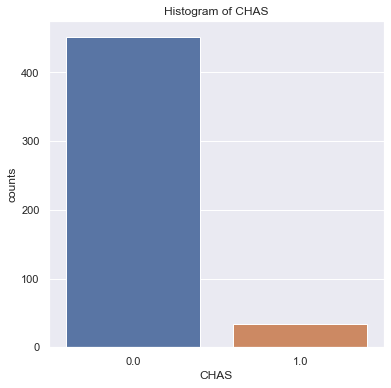

In [34]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['CHAS'])
plt.show
plt.xlabel('CHAS')
plt.ylabel('counts')
plt.title('Histogram of CHAS') 

In [37]:
#checking if this is an important predictor using annova
annova=ols('MEDV ~ CHAS',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))#Good predictor

               sum_sq     df         F   PR(>F)
CHAS       1382.20166    1.0  16.46678  0.00006
Residual  40626.38388  484.0       NaN      NaN


In [ ]:
#NOX - nitric oxides concentration (parts per 10 million)(conti.)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of NOX')

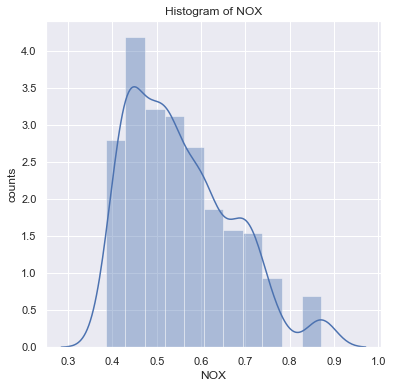

In [39]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['NOX'])
plt.show
plt.xlabel('NOX')
plt.ylabel('counts')
plt.title('Histogram of NOX') 

<AxesSubplot:>

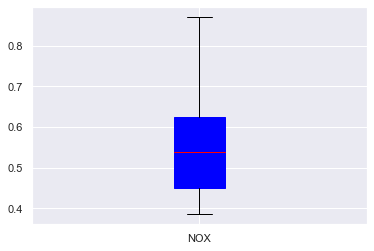

In [40]:
NOX=df['NOX']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
NOX.plot.box(color=props2,patch_artist=True,vert=True)

In [41]:
#RM - average number of rooms per dwelling(conti)

In [42]:
df.RM.value_counts()

6.405    3
6.127    3
6.417    3
5.713    3
6.167    3
        ..
6.319    1
5.877    1
7.929    1
6.101    1
6.976    1
Name: RM, Length: 433, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of RM')

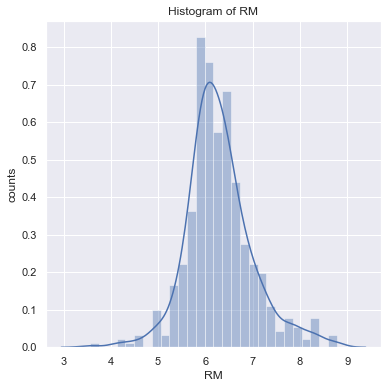

In [43]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['RM'])
plt.show
plt.xlabel('RM')
plt.ylabel('counts')
plt.title('Histogram of RM') 

<AxesSubplot:>

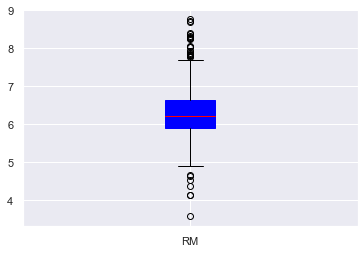

In [44]:
RM=df['RM']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
RM.plot.box(color=props2,patch_artist=True,vert=True)

In [45]:
#AGE - proportion of owner-occupied units built prior to 1940(conti.)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of AGE')

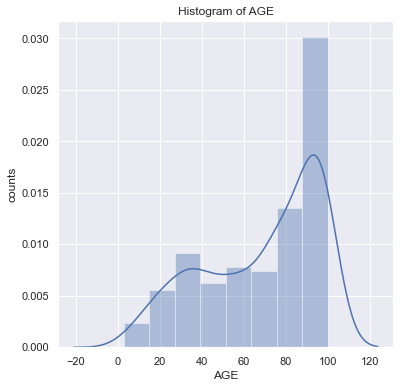

In [46]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['AGE'])
plt.show
plt.xlabel('AGE')
plt.ylabel('counts')
plt.title('Histogram of AGE')

<AxesSubplot:>

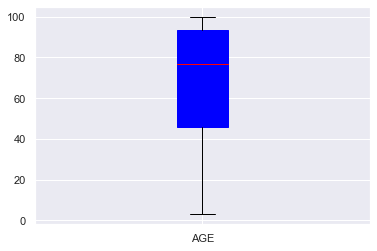

In [47]:
AGE=df['AGE']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
AGE.plot.box(color=props2,patch_artist=True,vert=True)

In [48]:
#DIS - weighted distances to five Boston employment centres(cont.)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of DIS')

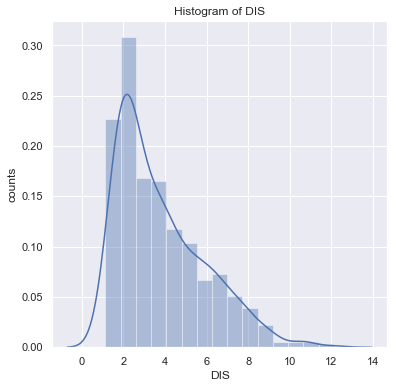

In [49]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['DIS'])
plt.show
plt.xlabel('DIS')
plt.ylabel('counts')
plt.title('Histogram of DIS')

<AxesSubplot:>

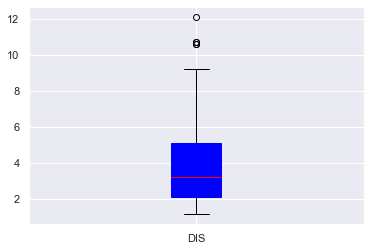

In [50]:
DIS=df['DIS']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
DIS.plot.box(color=props2,patch_artist=True,vert=True)

In [ ]:
#RAD - index of accessibility to radial highways(ordinal)(larger the number better the  accessibility)

In [52]:
df.RAD.value_counts()

24    123
5     112
4     107
3      37
2      24
8      24
6      24
1      19
7      16
Name: RAD, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Histogram of RAD')

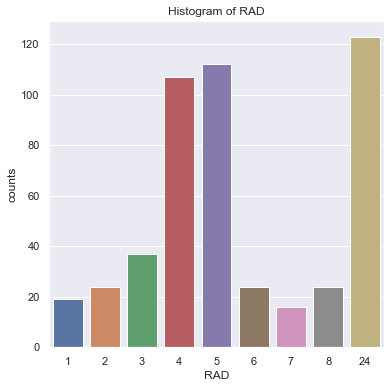

In [53]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['RAD'])
plt.show
plt.xlabel('RAD')
plt.ylabel('counts')
plt.title('Histogram of RAD')

In [54]:
#checking if this is an important predictor using annova
annova=ols('MEDV ~ RAD',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))#Good predictor

               sum_sq     df         F  PR(>F)
RAD        6049.47593    1.0  81.42433     0.0
Residual  35959.10960  484.0       NaN     NaN


In [55]:
#TAX - full-value property-tax rate per $10,000(conti.)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of TAX')

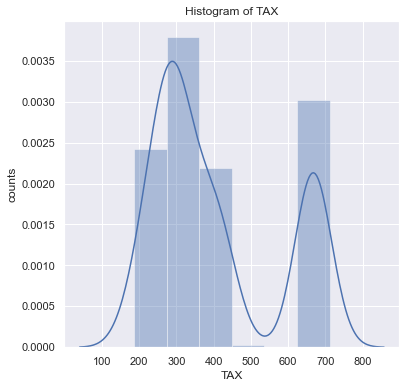

In [56]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['TAX'])
plt.show
plt.xlabel('TAX')
plt.ylabel('counts')
plt.title('Histogram of TAX')

<AxesSubplot:>

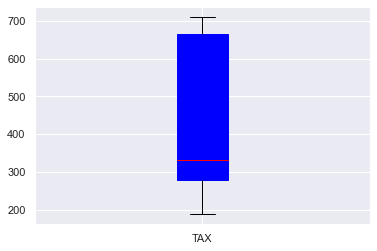

In [57]:
TAX=df['TAX']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
TAX.plot.box(color=props2,patch_artist=True,vert=True)

In [58]:
#PTRATIO - pupil-teacher ratio by town(conti.)

In [59]:
df.PTRATIO.value_counts()

20.2    131
14.7     33
21.0     26
17.8     22
19.2     19
17.4     18
19.1     16
18.6     16
18.4     16
16.6     15
21.2     15
13.0     12
15.2     11
20.9     11
17.9     10
18.7      9
19.6      8
19.7      8
17.6      7
16.9      5
16.4      5
20.1      5
18.0      5
16.1      5
19.0      4
18.3      4
16.8      4
16.0      4
18.2      4
14.9      4
17.0      4
18.5      4
18.9      3
12.6      3
14.8      3
15.3      3
15.9      2
15.6      2
18.8      2
22.0      2
15.1      1
13.6      1
14.4      1
17.3      1
21.1      1
15.5      1
Name: PTRATIO, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of PTRATIO')

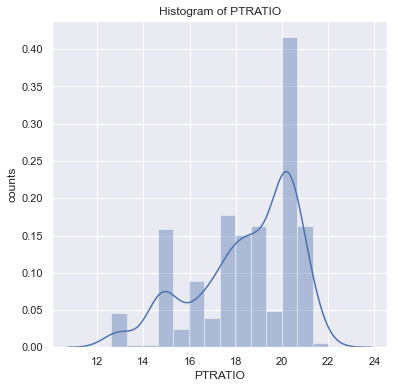

In [60]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['PTRATIO'])
plt.show
plt.xlabel('PTRATIO')
plt.ylabel('counts')
plt.title('Histogram of PTRATIO')

<AxesSubplot:>

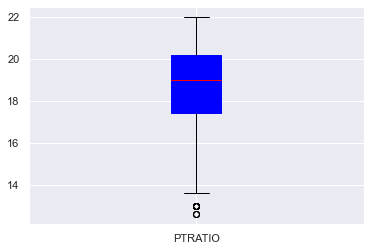

In [61]:
PTRATIO=df['PTRATIO']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
PTRATIO.plot.box(color=props2,patch_artist=True,vert=True)

In [62]:
#B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town(conti.)

In [63]:
df.B.value_counts()

396.90    119
393.74      3
395.24      3
395.11      2
394.72      2
         ... 
240.16      1
389.61      1
374.43      1
338.92      1
391.99      1
Name: B, Length: 341, dtype: int64

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of B')

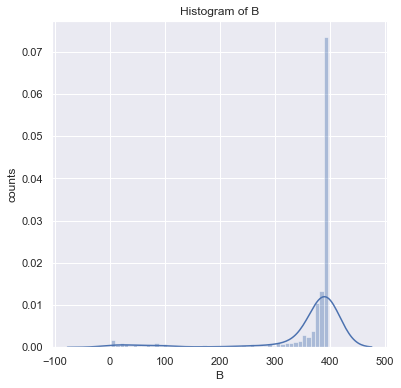

In [64]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['B'])
plt.show
plt.xlabel('B')
plt.ylabel('counts')
plt.title('Histogram of B')

<AxesSubplot:>

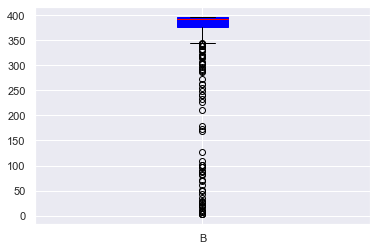

In [65]:
B=df['B']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
B.plot.box(color=props2,patch_artist=True,vert=True)

In [66]:
#LSTAT - % lower status of the population(conti)

C:\Users\telug\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of LSTAT')

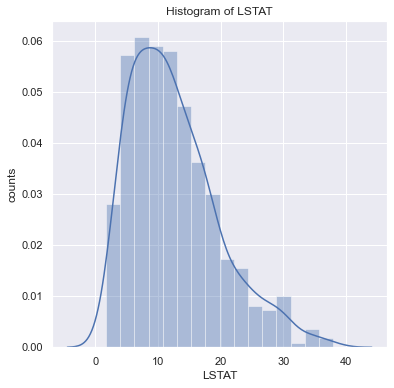

In [67]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['LSTAT'])
plt.show
plt.xlabel('LSTAT')
plt.ylabel('counts')
plt.title('Histogram of LSTAT')

<AxesSubplot:>

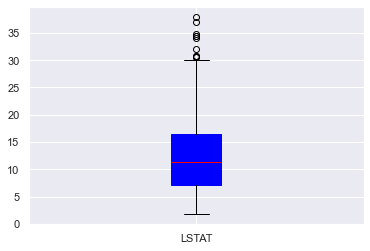

In [68]:
LSTAT=df['LSTAT']
props2= dict(boxes='blue',whiskers='black',medians='red',caps='black')
LSTAT.plot.box(color=props2,patch_artist=True,vert=True)

# MODEL BUILDING

In [69]:
#X and y
X=df.drop('MEDV',axis=1)
y=df['MEDV']

In [70]:
#train test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [73]:
#fit tree on train data
#model
regr=DecisionTreeRegressor()
#fit regression model on train set
regr.fit(X_train,y_train)
#predict/estimate_train_train X_train
yest_train=regr.predict(X_train)

[Text(0.6811025510341024, 0.975, 'X[5] <= 6.853\nsquared_error = 89.014\nsamples = 388\nvalue = 22.507'),
 Text(0.42754290561314123, 0.925, 'X[12] <= 14.4\nsquared_error = 41.341\nsamples = 324\nvalue = 19.647'),
 Text(0.1935237748399313, 0.875, 'X[7] <= 1.385\nsquared_error = 26.993\nsamples = 187\nvalue = 23.203'),
 Text(0.10782738443819787, 0.825, 'X[11] <= 339.985\nsquared_error = 91.577\nsamples = 4\nvalue = 44.475'),
 Text(0.10532875087842586, 0.775, 'squared_error = 0.0\nsamples = 1\nvalue = 27.9'),
 Text(0.11032601799796986, 0.775, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.2792201652416647, 0.825, 'X[5] <= 6.543\nsquared_error = 15.474\nsamples = 183\nvalue = 22.738'),
 Text(0.11532328511751386, 0.775, 'X[12] <= 7.515\nsquared_error = 9.099\nsamples = 147\nvalue = 21.581'),
 Text(0.03732333879909425, 0.725, 'X[9] <= 223.0\nsquared_error = 3.647\nsamples = 32\nvalue = 23.956'),
 Text(0.03482470523932225, 0.675, 'squared_error = 0.0\nsamples = 1\nvalue = 28.7'),


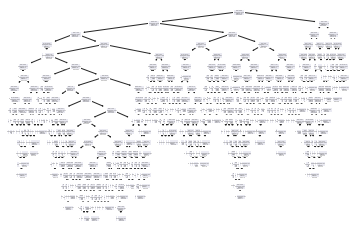

In [74]:
#tree_train
tree.plot_tree(regr.fit(X_train,y_train))

<function matplotlib.pyplot.show(close=None, block=None)>

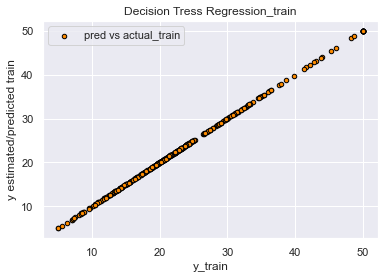

In [76]:
#on ploting results we find tree has learnt everything
plt.figure()
plt.scatter(y_train,yest_train,s=20,edgecolor='black',c='darkorange',label='pred vs actual_train')
plt.xlabel('y_train')
plt.ylabel('y estimated/predicted train')
plt.title('Decision Tress Regression_train')
plt.legend()
plt.show

In [96]:
#mse values
from sklearn.metrics import mean_squared_error
mse_train=mean_squared_error(y_train,yest_train)
print(mse_train)

0.0


In [97]:
#mse @ test
#predict/estimate_test X_est
yest_test=regr.predict(X_test)
#residual test
test_residual=y_test-yest_test
#mse
mse_test=mean_squared_error(y_test,yest_test)
print(mse_test)

30.21316326530612


In [98]:
#find optinum no of depth
depth=[1,2,3,4,5,6,7,8,9,10,11]
mse_train,mse_test=[],[]
for i in depth:
        prdctr=DecisionTreeRegressor(max_depth=i)
        prdctr.fit(X_train,y_train)
        y_train_pred=prdctr.predict(X_train)
        y_test_pred=prdctr.predict(X_test)
        
        mse_train.append(mean_squared_error(y_train,y_train_pred))
        mse_test.append(mean_squared_error(y_test,y_test_pred))
        

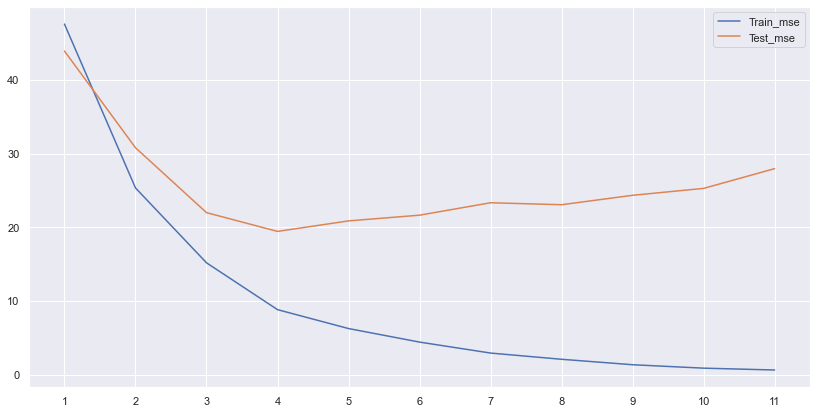

In [83]:
#plot
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=mse_train,x=depth,label='Train_mse')
sns.lineplot(y=mse_test,x=depth,label='Test_mse')
plt.xticks(ticks=np.arange(1,12,1))
plt.show()

In [99]:
#Build tree with 1 depth
tree=DecisionTreeRegressor(random_state=40,max_depth=1)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

print(round(mean_squared_error(y_train,y_train_pred),2))
print(round(mean_squared_error(y_test,y_test_pred),2))

47.58
43.92


In [100]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

6.897807181897695

In [101]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

6.627133650873646